Loaded free variables: {'A'}

Reading partition_1.json...


/tmp/ipykernel_72633/474597455.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_components))


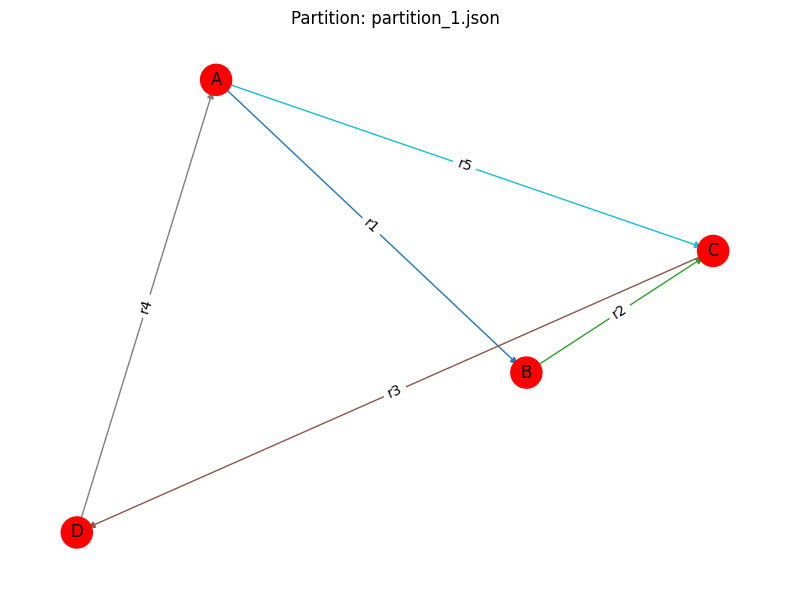


Reading partition_10.json...


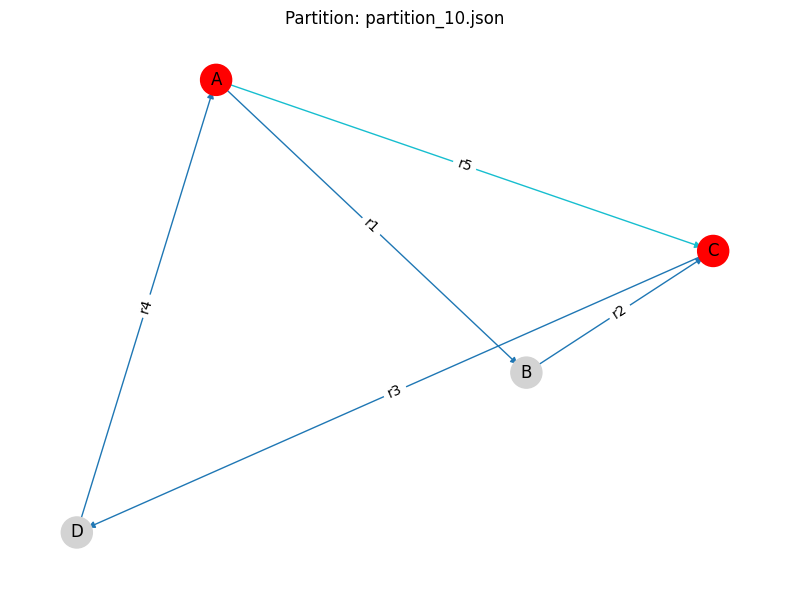


Reading partition_11.json...


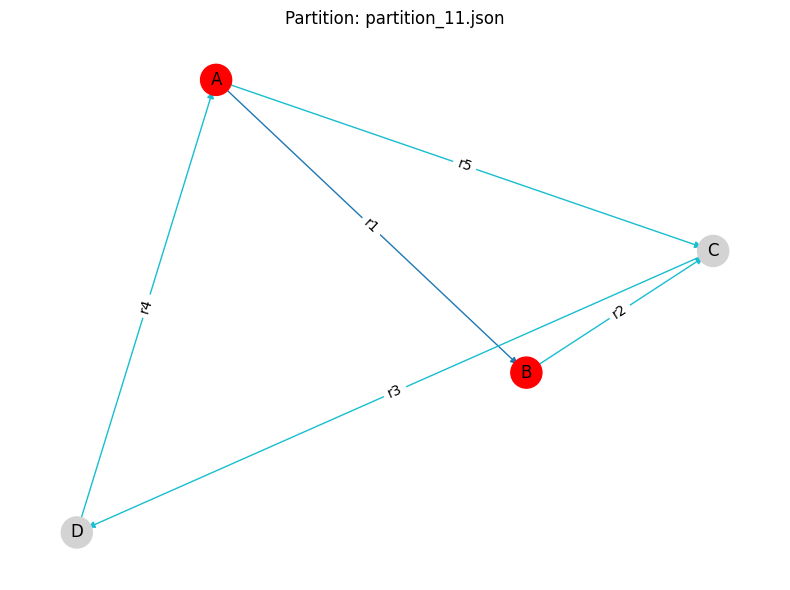


Reading partition_12.json...


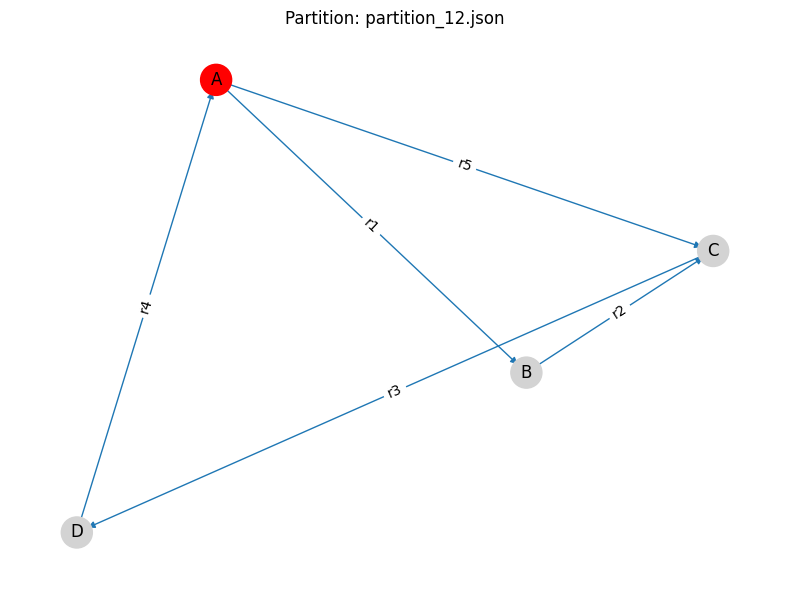


Reading partition_13.json...


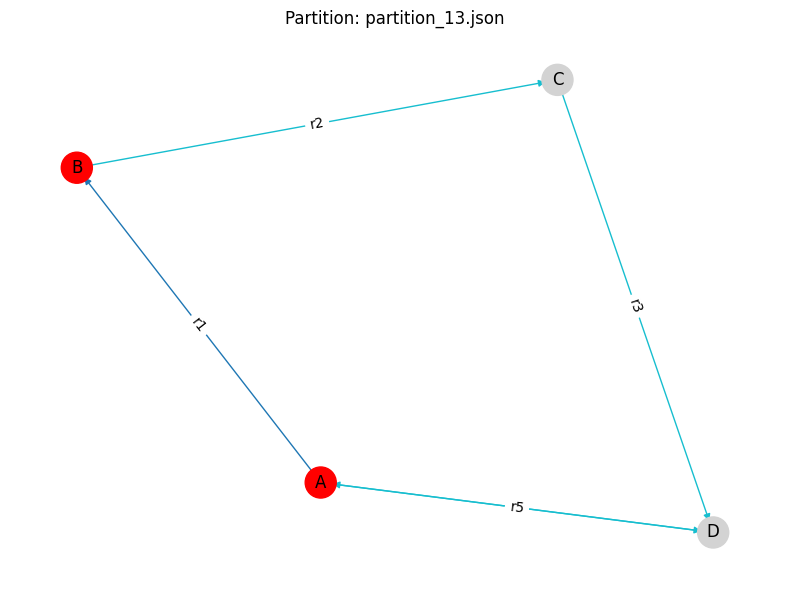


Reading partition_14.json...


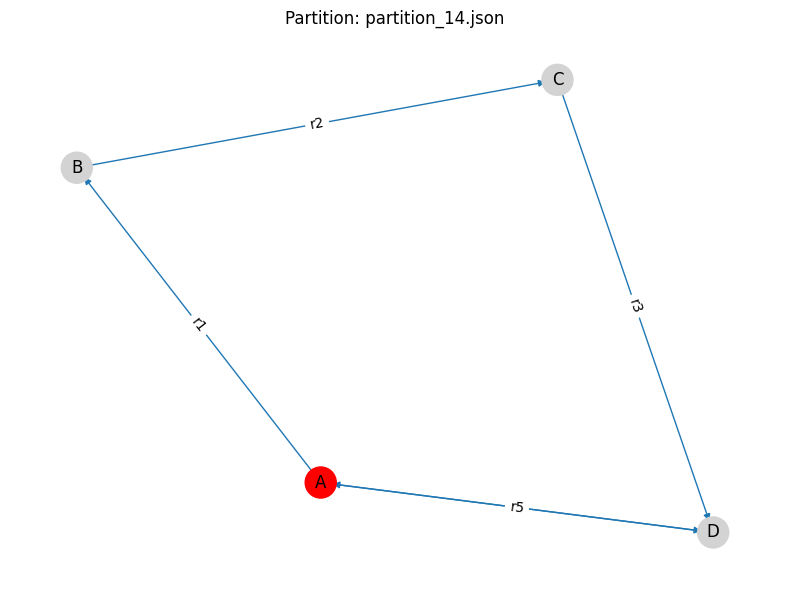


Reading partition_2.json...


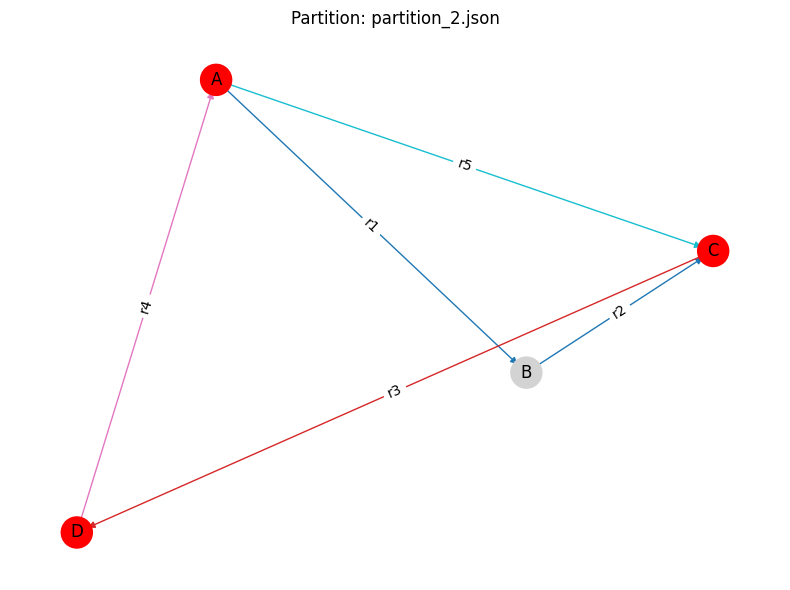


Reading partition_3.json...


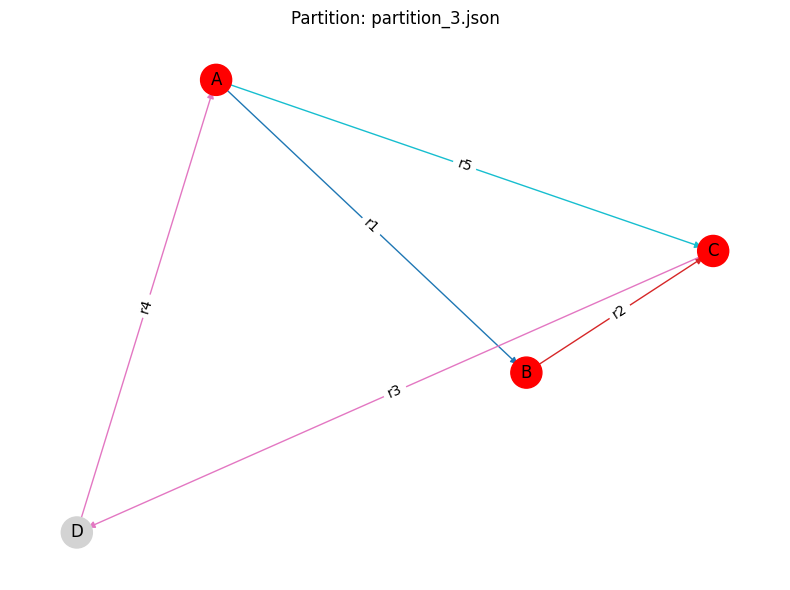


Reading partition_4.json...


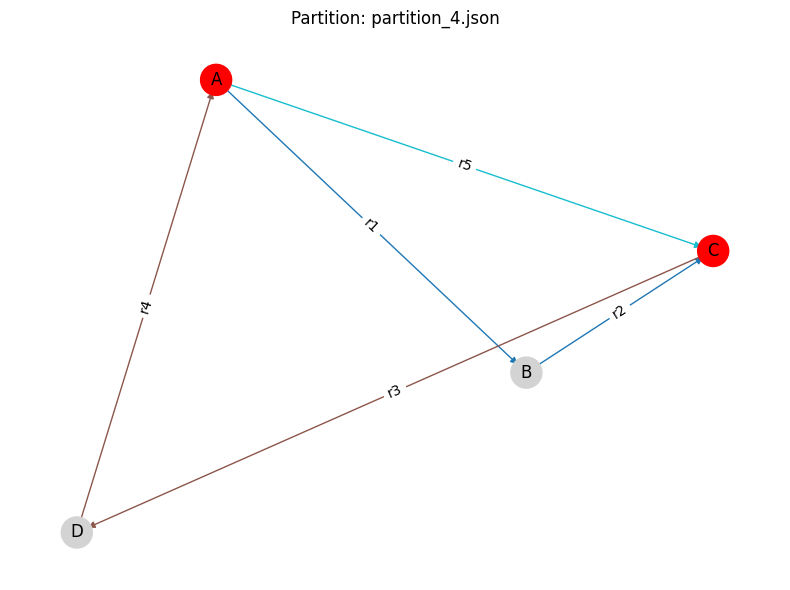


Reading partition_5.json...


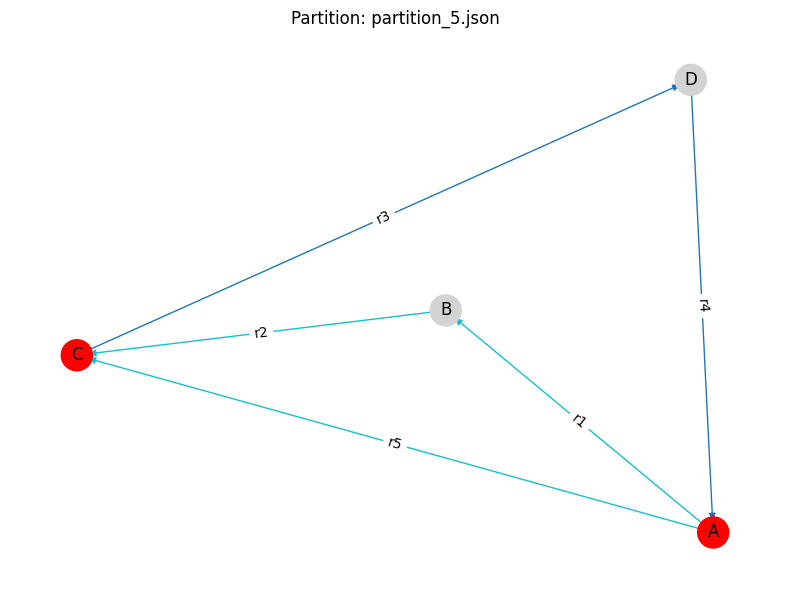


Reading partition_6.json...


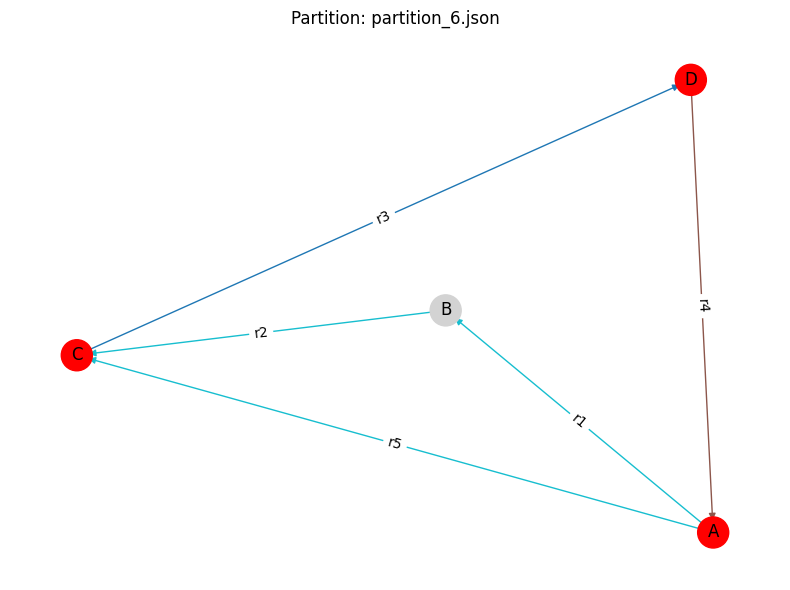


Reading partition_7.json...


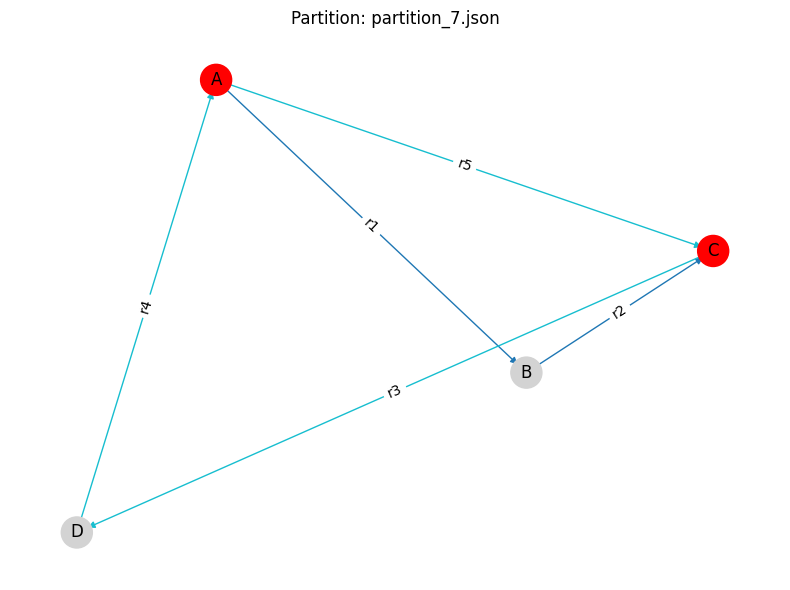


Reading partition_8.json...


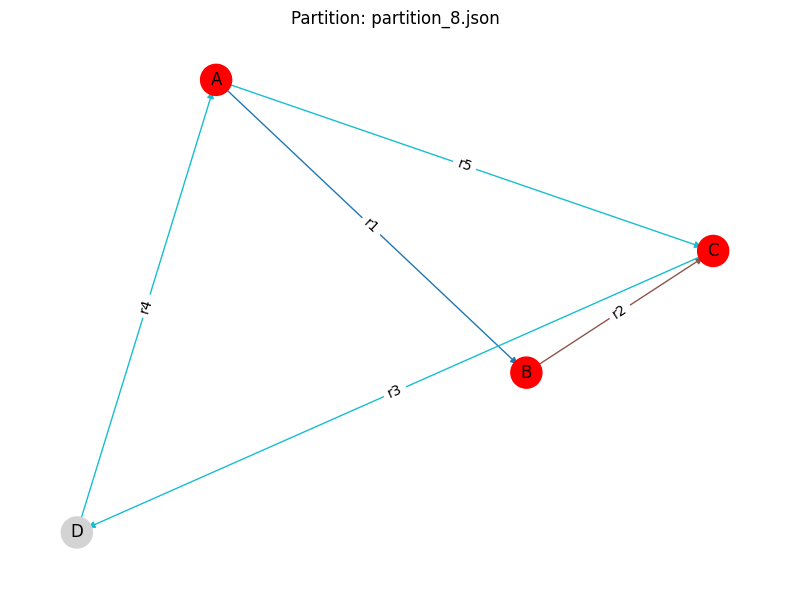


Reading partition_9.json...


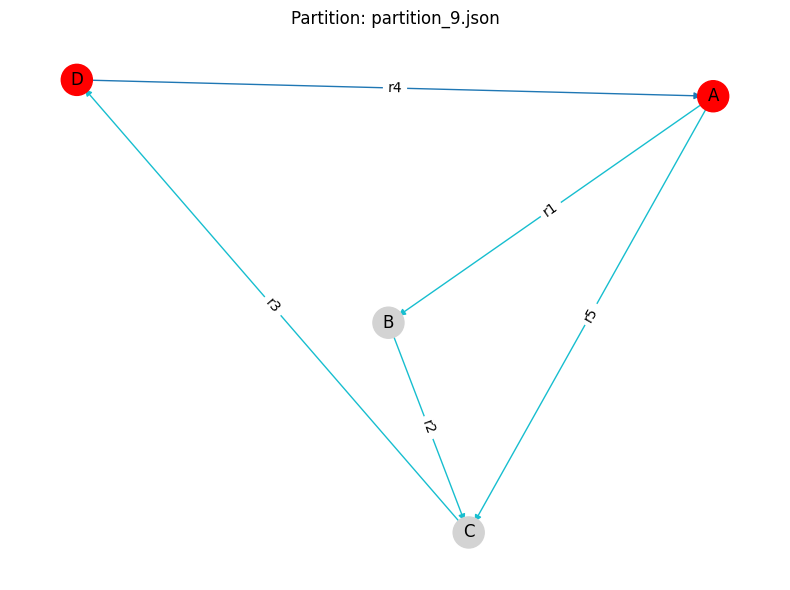

In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from collections import defaultdict

# Set your base directory
basedir = "app/temp"

# Load free variables from JSON file
free_vars_path = os.path.join(basedir, "free_vars.json")
with open(free_vars_path, 'r') as f:
    free_vars = set(json.load(f))
print(f"Loaded free variables: {free_vars}")

# Load partition JSONs
files = sorted([f for f in os.listdir(basedir) if f.startswith("partition_") and f.endswith(".json")])

for path in files:
    print(f"\nReading {path}...")
    with open(os.path.join(basedir, path), 'r') as file:
        data = json.load(file)

    G = nx.DiGraph()
    edge_component = {}
    edge_labels = {}
    node_to_components = defaultdict(set)

    for edge in data:
        src, tgt, label = edge['source'], edge['target'], edge['label']
        comp_id = int(edge['component'])

        G.add_edge(src, tgt, label=label)
        edge_component[(src, tgt)] = comp_id
        edge_labels[(src, tgt)] = label

        node_to_components[src].add(comp_id)
        node_to_components[tgt].add(comp_id)

    # Identify join nodes: in at least two components or in free_vars
    join_nodes = {n for n, comps in node_to_components.items() if len(comps) > 1 or n in free_vars}

    # Edge colors by component ID
    unique_components = sorted(set(edge_component.values()))
    cmap = cm.get_cmap('tab10', len(unique_components))
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_components) - 1)
    edge_colors = [cmap(norm(edge_component[e])) for e in G.edges]

    # Node colors: red for join nodes, light gray otherwise
    node_colors = ["red" if n in join_nodes else "lightgray" for n in G.nodes]

    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
    nx.draw_networkx_edges(G, pos, arrows=True, edge_color=edge_colors)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Partition: {path}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
